In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Project-X-Lip-Reading

/content/drive/.shortcut-targets-by-id/1_r1ryXDRaCdsR0PFGkkxkbeXFIv5d38H/Project-X-Lip-Reading


In [ ]:
import pickle
import time
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, MaxPooling3D
from tensorflow.keras.layers import Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/train/X_train.pkl', 'rb') as f:
   X_train = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/train/y_train.pkl', 'rb') as f:
   y_train = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/test/X_test.pkl', 'rb') as f:
   X_test = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/test/y_test.pkl', 'rb') as f:
   y_test = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/val/X_val.pkl', 'rb') as f:
   X_val = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/val/y_val.pkl', 'rb') as f:
   y_val = pickle.load(f)

In [ ]:
def build_3d_cnn_model(input, num_classes, learning_rate = 0.01, dropout_rate = 0.5):

    model = Sequential()

    # 1st Layer group
    model.add(Conv3D(128, 3, input_shape=input, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPool3D((2,2,2)))

    # 2nd Layer group
    model.add(Conv3D(256, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPool3D((2,2,2)))

    # 3rd Layer group
    model.add(Conv3D(75, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPool3D((2,2,2)))

    # Reshape
    model.add(Reshape((75, 3*12*12)))

    # Bi-LSTM Layers
    model.add(Bidirectional(LSTM(32, kernel_initializer='Orthogonal', return_sequences=True)))
    model.add(Dropout(dropout_rate))

    model.add(Bidirectional(LSTM(32, kernel_initializer='Orthogonal', return_sequences=True)))
    model.add(Dropout(dropout_rate))

    # Flatten Layer
    model.add(Flatten())

    # Dense Layer
    model.add(Dense(num_classes, activation='softmax'))

    # Model Compilation
    model.compile(optimizer=Adam(learning_rate = learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Tuning Hyperparameters
input = (28, 100, 100, 1)
num_classes = 11
learning_rate = 0.001
dropout_rate = 0.5

In [ ]:
# Build Model
model = build_3d_cnn_model(input, num_classes, learning_rate, dropout_rate)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                      │ (None, 28, 100, 100, 128)   │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 28, 100, 100, 128)   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d (MaxPooling3D)         │ (None, 14, 50, 50, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_1 (Conv3D)                    │ (None, 14, 50, 50, 256)     │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 14, 50, 50, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_1 (MaxPooling3D)       │ (None, 7, 25, 25, 256)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_2 (Conv3D)                    │ (None, 7, 25, 25, 75)       │         518,475 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 7, 25, 25, 75)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_2 (MaxPooling3D)       │ (None, 3, 12, 12, 75)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 75, 432)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 75, 64)              │         119,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 75, 64)              │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 75, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4800)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 11)                  │          52,811 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,603,734 (6.12 MB)

 Trainable params: 1,603,734 (6.12 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Early Stopping
# from tensorflow.keras.callbacks import EarlyStopping
# early_stop = EarlyStopping(monitor="val_loss", patience=4)


  ## GPU Memory Optimization
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# Model Training
import time
t1 = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size = 8)
t2 = time.time()
print(f"Training time : {t2 - t1} sec")

ERROR:tensorflow:An interactive session is already active. This can cause out-of-memory errors or some other unexpected errors (due to the unpredictable timing of garbage collection) in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s). Please use `tf.Session()` if you intend to productionize.


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 59s 594ms/step - accuracy: 0.1600 - loss: 2.2642 - val_accuracy: 0.1900 - val_loss: 2.2286
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 60s 599ms/step - accuracy: 0.1820 - loss: 2.2247 - val_accuracy: 0.1900 - val_loss: 2.1627
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 85s 629ms/step - accuracy: 0.2131 - loss: 2.1307 - val_accuracy: 0.2400 - val_loss: 2.0878
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 79s 603ms/step - accuracy: 0.3054 - loss: 1.8986 - val_accuracy: 0.3900 - val_loss: 1.7354
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 601ms/step - accuracy: 0.4377 - loss: 1.5871 - val_accuracy: 0.4600 - val_loss: 1.5524
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 60s 597ms/step - accuracy: 0.5256 - loss: 1.3069 - val_accuracy: 0.5500 - val_loss: 1.3923
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 60s 600ms/step - accuracy: 0.5856 - loss: 1.1512 - val_accuracy: 0.5600 - val_loss: 1.4885
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 605ms/step - accuracy: 0.7166 - loss: 0

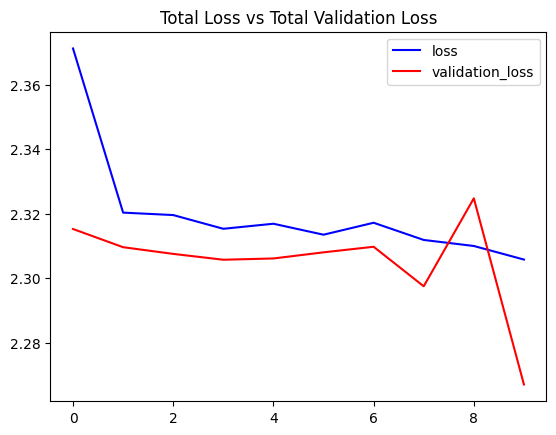

In [ ]:
# Visualizing the training and validation loss
plt.plot(history.history['loss'], 'blue', label = 'loss')
plt.plot(history.history['val_loss'], 'red', label = 'validation_loss')
plt.title("Total Loss vs Total Validation Loss")
plt.legend()
plt.show()

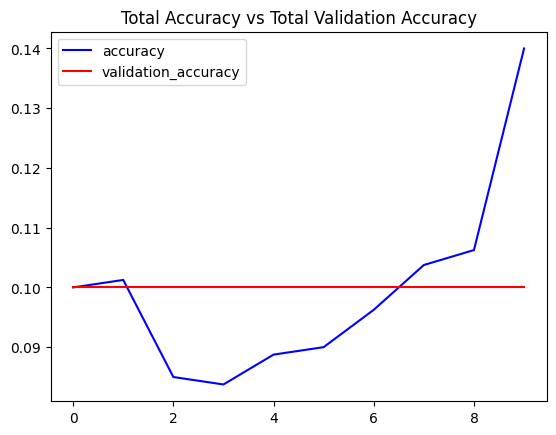

In [ ]:
# Visualizing the training and validation accuracy
plt.plot(history.history['accuracy'], 'blue', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'red', label = 'validation_accuracy')
plt.title("Total Accuracy vs Total Validation Accuracy")
plt.legend()
plt.show()

In [ ]:

# Model Evaluation
scores = model.evaluate(X_test, y_test, verbose=1, batch_size = 8)
print("Accuracy: %.2f%%" % (scores[1]*100))

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - accuracy: 0.0874 - loss: 2.3078
Accuracy: 14.00%


In [ ]:
# Saving Model
model.save('/content/drive/MyDrive/Project-X-Lip-Reading/Model Architecture/Saved Model/3D_CNN_Bi-LSTM.h5')